In [1]:
import requests
import tarfile
import os

IMAGE_PATH = "VOCdevkit/VOC2007/JPEGImages"

if not os.path.isdir('data'):
  data = requests.get("http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar")
  with open("data.tar", 'wb') as f:
      f.write(data.content) 

  tar = tarfile.open("data.tar")
  tar.extractall()
  tar.close()


In [2]:
import glob
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd


In [3]:
path = '/content/VOCdevkit/VOC2007/JPEGImages/'

In [4]:
X = []
Y_Mid = []
Y_Large = []

filelist = glob.glob(path+'*.jpg')

print(filelist)
numImages = 100
for f in filelist[:numImages]:
  img = cv2.imread(f)/255
  X.append(cv2.resize(img,(72,72)))
  Y_Mid.append(cv2.resize(img,(144,144)))
  Y_Large.append(cv2.resize(img,(288,288)))

X = np.array(X); Y_Mid = np.array(Y_Mid); Y_Large = np.array(Y_Large)
X.shape, Y_Mid.shape, Y_Large.shape

['/content/VOCdevkit/VOC2007/JPEGImages/006835.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/004150.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/002054.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/005664.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/006583.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/008171.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/001958.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/008444.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/002669.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/004913.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/003066.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/001785.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/006956.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/002745.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/003165.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/002361.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/007159.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/008534.jpg', '/content/VOCdevkit/VOC2007/JPEGImages/006704.jpg', '/content/V

((100, 72, 72, 3), (100, 144, 144, 3), (100, 288, 288, 3))

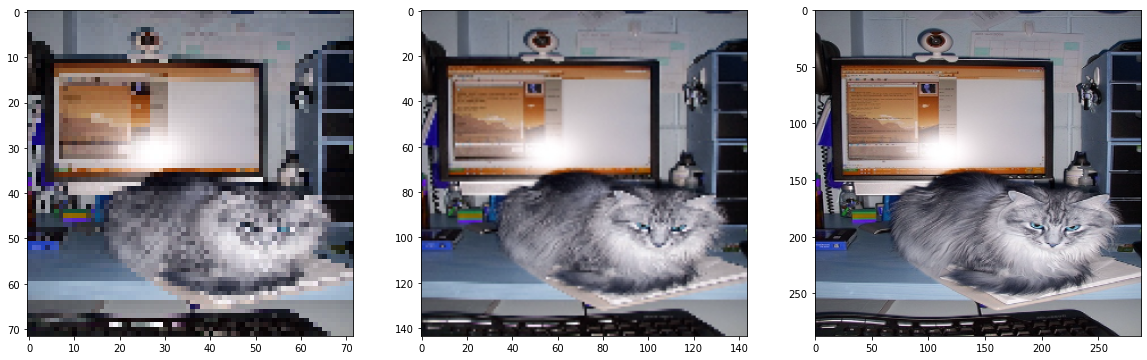

In [5]:
def plot_multiImages(ind,df1,df2,df3):
  fig, ax = plt.subplots(1,3,figsize = (20,6))
  ax[0].imshow(df1[ind])
  ax[1].imshow(df2[ind])
  ax[2].imshow(df3[ind])

def plot_multiImages2(ind,df1,df2,df3,df4,df5):
  fig, ax = plt.subplots(1,3,figsize = (20,6))
  ax[0].imshow(df1[ind])
  ax[1].imshow(df2[ind])
  ax[2].imshow(df3[ind])
  fig2, ax2 = plt.subplots(1,3,figsize = (20,6))
  ax2[0].imshow(df1[ind])
  ax2[1].imshow(df4[ind])
  ax2[2].imshow(df5[ind])


plot_multiImages(1,X,Y_Mid,Y_Large)

# **Indexing**

In [6]:
split = int(numImages/5*4)
split

80

# **Mid Model**

In [ ]:
from tensorflow.keras.models import Model,Sequential

inp = Input((72,72,3))
x = Conv2D(64,(3,3),activation="relu",padding="same")(inp)
x = Conv2D(64,(3,3),activation="relu",padding="same")(x)
x = UpSampling2D(size=2, interpolation='bilinear')(x)
x = Conv2D(3,(1,1),activation="sigmoid")(x)
Model = Model(inputs = inp,outputs = x)
Model.compile(loss='mse',optimizer='adam')
Model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 72, 72, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 72, 72, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 144, 144, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 144, 144, 3)       195       
Total params: 38,915
Trainable params: 38,915
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Model.fit(X[:split],Y_Mid[:split],validation_data=(X[split:],Y_Mid[split:]),epochs=100)

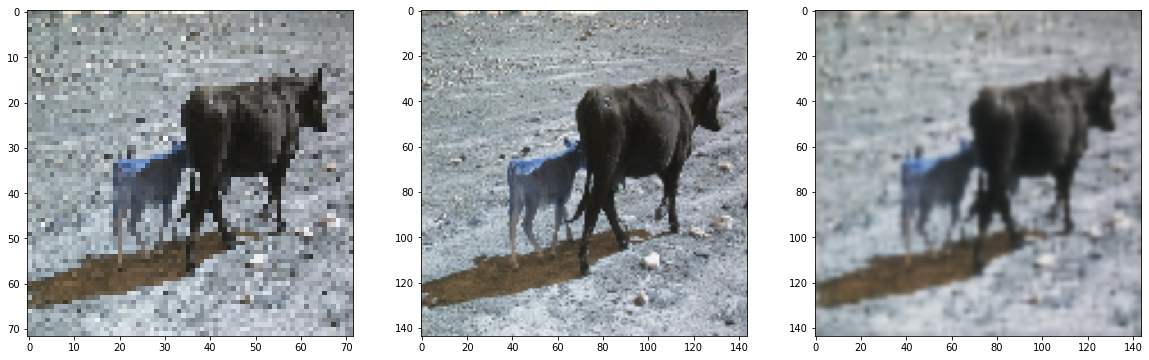

In [ ]:
predictions = Model.predict(X[split:])
plot_multiImages(1,X[split:],Y_Mid[split:],predictions)

## **Bilinear**

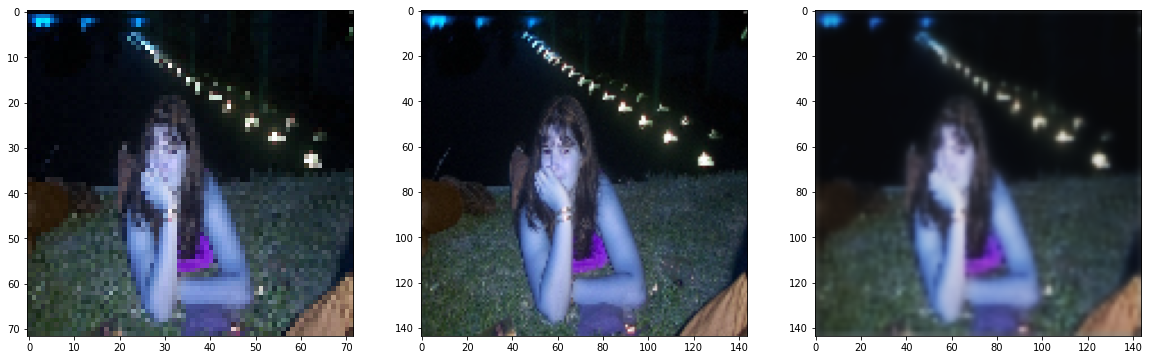

In [ ]:
predictions = Model.predict(X[split:])
plot_multiImages(1,X[split:],Y_Mid[split:],predictions)

# **Mid+Large Model**

In [ ]:
from tensorflow.keras.models import Model,Sequential

inp = Input((72,72,3))
x = Conv2D(64,(3,3),activation="relu",padding="same")(inp)
x = Conv2D(64,(3,3),activation="relu",padding="same")(x)
x = UpSampling2D(size=2, interpolation='bilinear')(x)
z = Conv2D(3,(1,1),activation="sigmoid")(x)
y = UpSampling2D(size=2, interpolation='bilinear')(x)
y = Conv2D(3,(1,1),activation="sigmoid")(y)
BaseModel = Model(inputs = inp,outputs = [z,y])
BaseModel.compile(loss='mse',optimizer='adam')
BaseModel.summary()

Model: "model_65"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_75 (InputLayer)           [(None, 72, 72, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_207 (Conv2D)             (None, 72, 72, 64)   1792        input_75[0][0]                   
__________________________________________________________________________________________________
conv2d_208 (Conv2D)             (None, 72, 72, 64)   36928       conv2d_207[0][0]                 
__________________________________________________________________________________________________
up_sampling2d_28 (UpSampling2D) (None, 144, 144, 64) 0           conv2d_208[0][0]                 
___________________________________________________________________________________________

In [ ]:
BaseModel.fit(X[:split],[Y_Mid[:split],Y_Large[:split]],validation_data=(X[split:],[Y_Mid[split:],Y_Large[split:]]),epochs=100)

## **Results**

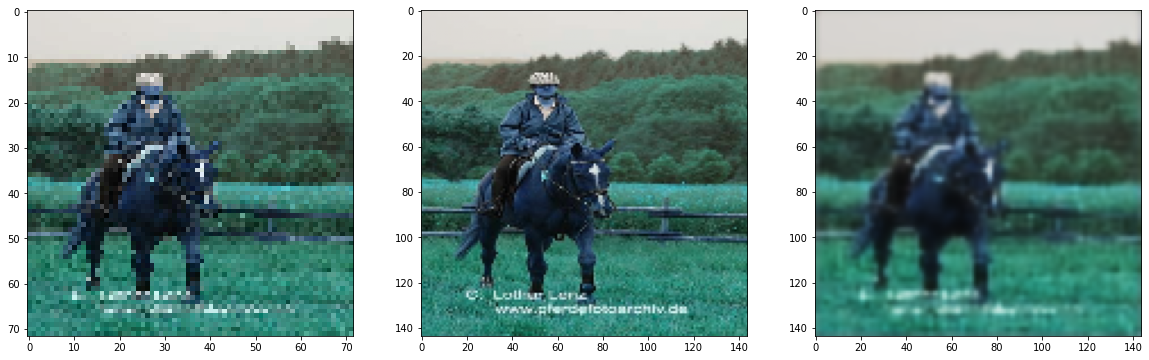

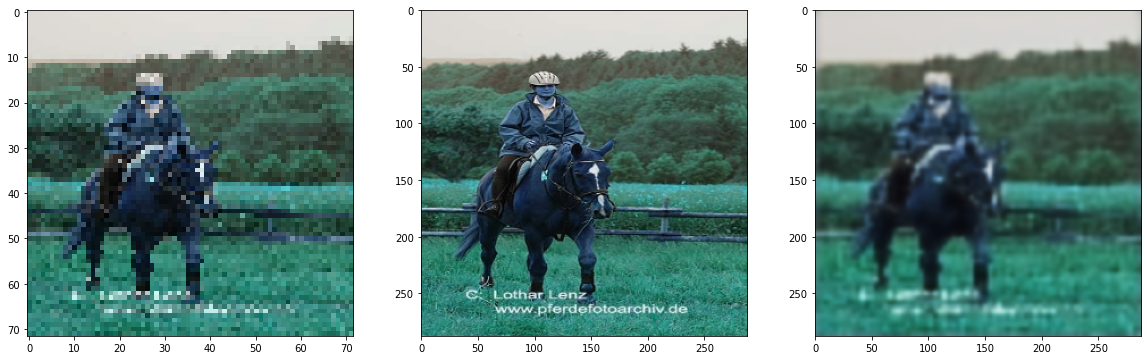

In [ ]:
(BasePred1,BasePred2) = BaseModel.predict(X[split:])
plot_multiImages2(0,X[split:],Y_Mid[split:],BasePred1,Y_Large[split:],BasePred2)

# **Rel Block**

In [19]:
from tensorflow.keras.models import Model,Sequential

def GetReluBlock(chnl=32):
  inp = Input((None,None,chnl))
  x = Conv2D(chnl,3,activation=LeakyReLU(alpha=0.2),padding='same')(inp)
  x = Conv2D(chnl,3,activation=LeakyReLU(alpha=0.2),padding='same')(x)
  x = add([inp,x])
  x = LeakyReLU(alpha=0.2)(x)
  return Model(inputs = inp,outputs = x)

Model: "model_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           [(None, 72, 72, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 72, 72, 32)   128         input_24[0][0]                   
__________________________________________________________________________________________________
activation_3 (Activation)       (None, 72, 72, 32)   0           conv2d_36[0][0]                  
__________________________________________________________________________________________________
model_17 (Functional)           (None, None, None, 3 18496       activation_3[0][0]               
___________________________________________________________________________________________

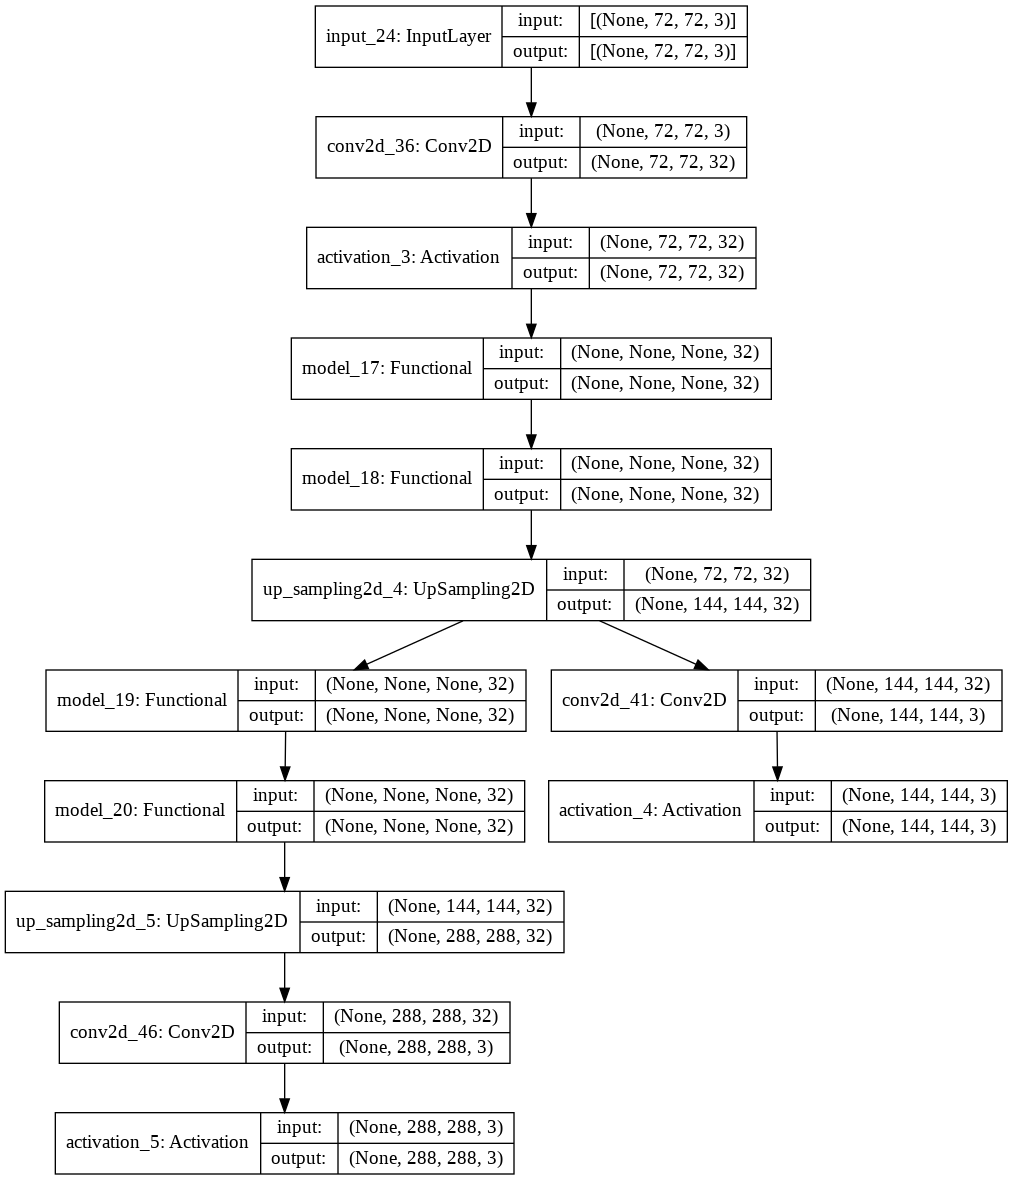

In [135]:
from tensorflow.keras.models import Model,Sequential

inp = Input((72,72,3))
x = Conv2D(32,1)(inp)
x = Activation(LeakyReLU(alpha=0.2))(x)
x = GetReluBlock(32)(x)
x = GetReluBlock(32)(x)
x = UpSampling2D(size=2, interpolation='bilinear')(x)
y1 = Conv2D(3,(1,1),activation="sigmoid")(x)
y1 = Activation(LeakyReLU(alpha=0.2))(y1)
x = GetReluBlock(32)(x)
x = GetReluBlock(32)(x)
x = UpSampling2D(size=2, interpolation='bilinear')(x)
y2 = Conv2D(3,(1,1),activation="sigmoid")(x)
y2 = Activation(LeakyReLU(alpha=0.2))(y2)
RelModel = Model(inputs = inp,outputs = [y1,y2])
RelModel.compile(loss='mse',optimizer='adam')
RelModel.summary()
keras.utils.plot_model(RelModel, show_shapes=True)

In [ ]:
RelModel.fit(X[:split],[Y_Mid[:split],Y_Large[:split]],validation_data=(X[split:],[Y_Mid[split:],Y_Large[split:]]),epochs=100)

## **Results**

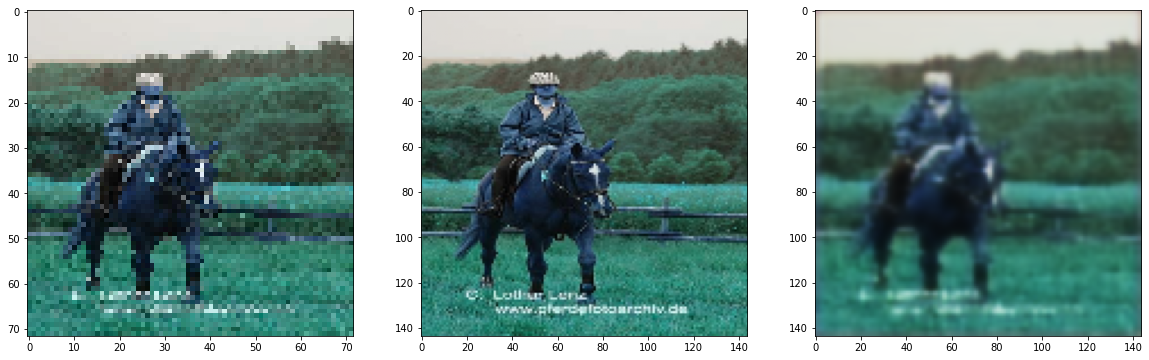

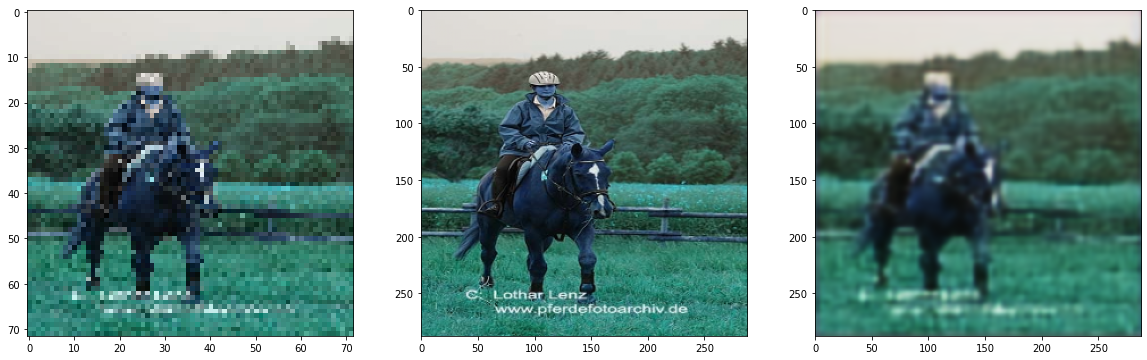

In [ ]:
(RelPred1,RelPred2) = RelModel.predict(X[split:])
plot_multiImages2(0,X[split:],Y_Mid[split:],RelPred1,Y_Large[split:],RelPred2)

# **Dilation**

In [ ]:
from tensorflow.keras.models import Model,Sequential

def GetDilationBlock(chnl=32):
  inp = Input((None,None,chnl))
  D1 = Conv2D(chnl,3,activation=LeakyReLU(alpha=0.2),padding='same',dilation_rate=1)(inp)
  D2 = Conv2D(chnl,3,activation=LeakyReLU(alpha=0.2),padding='same',dilation_rate=2)(inp)
  D3 = Conv2D(chnl,3,activation=LeakyReLU(alpha=0.2),padding='same',dilation_rate=4)(inp)
  concat_layer= concatenate([D1, D2,D3],axis=-1)
  x = Activation(LeakyReLU(alpha=0.2))(concat_layer)
  out = Conv2D(chnl,1)(x)
  return Model(inputs = inp,outputs = out)

NewModel = GetDilationBlock()
NewModel.summary()

In [ ]:
from tensorflow.keras.models import Model,Sequential

inp = Input((72,72,3))
x = Conv2D(32,1)(inp)
x = Activation(LeakyReLU(alpha=0.2))(x)
x = GetDilationBlock(32)(x)
x = GetDilationBlock(32)(x)
x = UpSampling2D(size=2, interpolation='bilinear')(x)
y1 = Conv2D(3,(1,1),activation="sigmoid")(x)
y1 = Activation(LeakyReLU(alpha=0.2))(y1)
x = GetDilationBlock(32)(x)
x = GetDilationBlock(32)(x)
x = UpSampling2D(size=2, interpolation='bilinear')(x)
y2 = Conv2D(3,(1,1),activation="sigmoid")(x)
y2 = Activation(LeakyReLU(alpha=0.2))(y2)
DilModel = Model(inputs = inp,outputs = [y1,y2])
DilModel.compile(loss='mse',optimizer='adam')
DilModel.summary()



In [ ]:
DilModel.fit(X[:split],[Y_Mid[:split],Y_Large[:split]],validation_data=(X[split:],[Y_Mid[split:],Y_Large[split:]]),epochs=100)

## **Results**

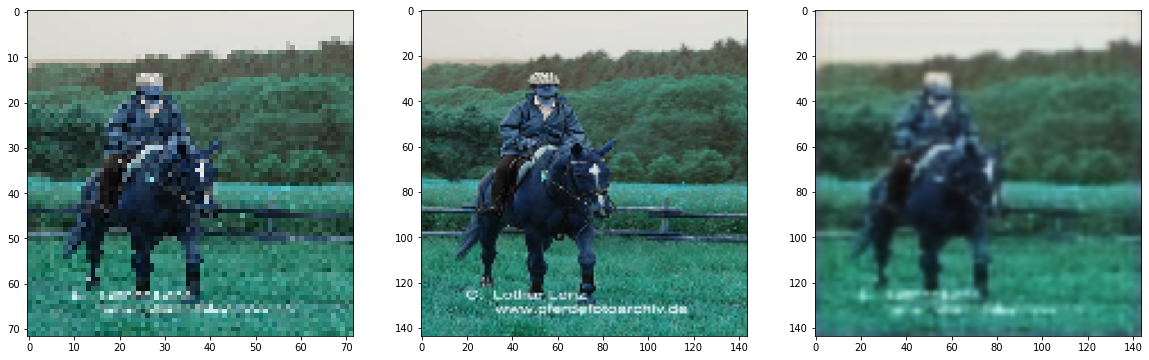

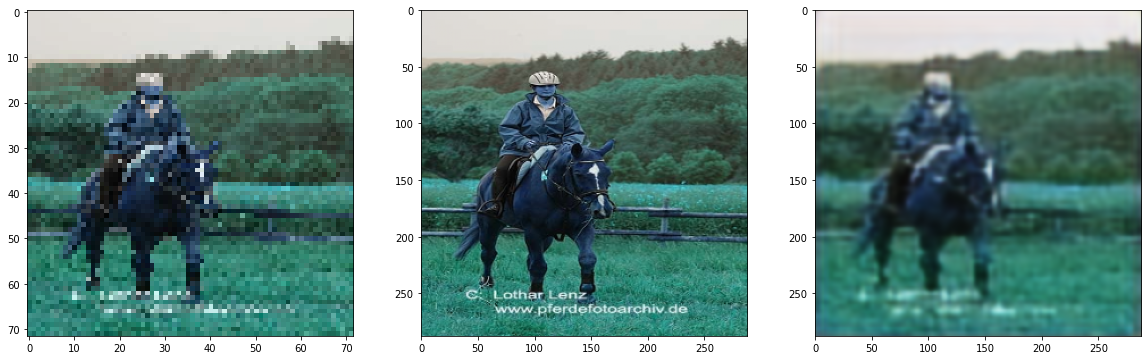

In [ ]:
(DilationPred1,DilationPred2) = DilModel.predict(X[split:])
plot_multiImages2(0,X[split:],Y_Mid[split:],DilationPred1,Y_Large[split:],DilationPred2)

# **Comparing**

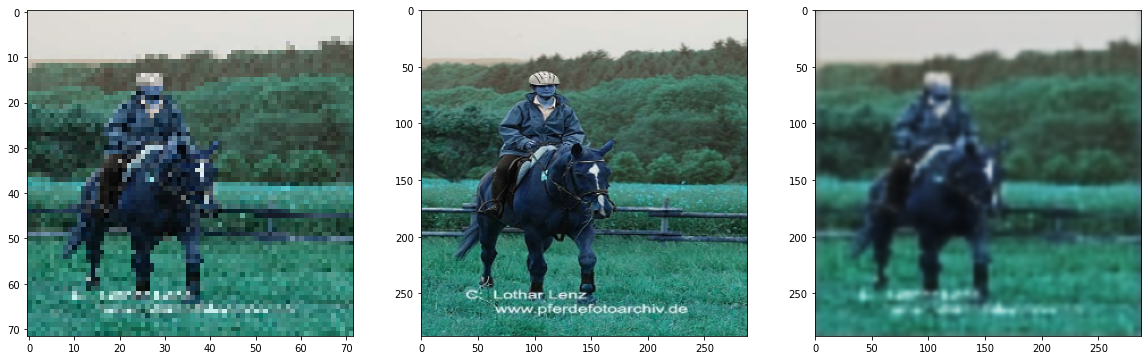

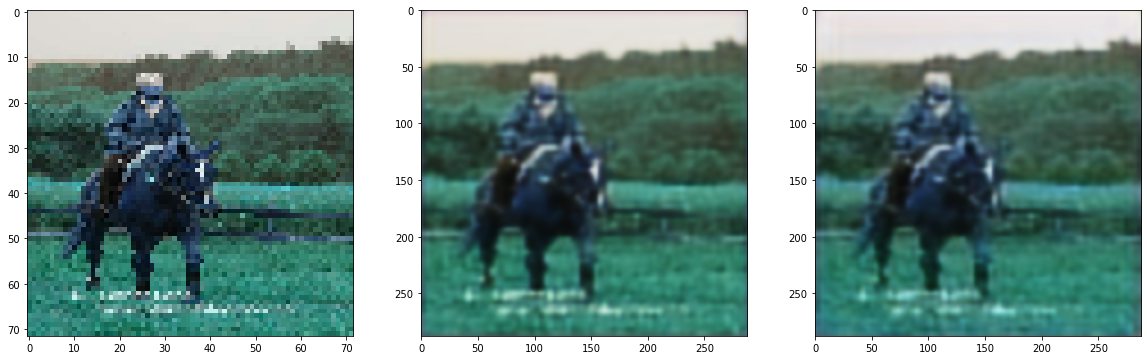

In [ ]:
plot_multiImages2(0,X[split:],Y_Large[split:],pred2,RelPred2,DilationPred2)

The predictions that result from the res blocks and the dialation blocks seem to be almost identical, maybe using more complex models will lead to better results.

# VGG16 Feature Extractor


In [11]:
def getVGG16(chnls):
    vgg16 = VGG16(weights='imagenet', include_top=False)
    for l in vgg16.layers:
        l.trainable = False
    model = Model(inputs = vgg16.input,outputs = vgg16.layers[2].output)
    return model

  

In [ ]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications import VGG16

inp = Input((72,72,3))
x = Conv2D(64,(3,3),activation="relu",padding="same")(inp)
x = Conv2D(64,(3,3),activation="relu",padding="same")(x)
vgg = getVGG16(32)(inp)
vgg = UpSampling2D(size=2, interpolation='bilinear')(vgg)
concat_layer= concatenate([vgg, x],axis=-1)
x = UpSampling2D(size=2, interpolation='bilinear')(concat_layer)
y1 = Conv2D(3,(1,1),activation="sigmoid")(x)
y2 = UpSampling2D(size=2, interpolation='bilinear')(x)
y2 = Conv2D(3,(1,1),activation="sigmoid")(y2)
VGGModel = Model(inputs = inp,outputs = [y1,y2])
VGGModel.compile(loss='mse',optimizer='adam')
VGGModel.summary()

Model: "model_195"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_238 (InputLayer)          [(None, 72, 72, 3)]  0                                            
__________________________________________________________________________________________________
model_194 (Functional)          (None, None, None, 6 38720       input_238[0][0]                  
__________________________________________________________________________________________________
conv2d_548 (Conv2D)             (None, 72, 72, 64)   1792        input_238[0][0]                  
__________________________________________________________________________________________________
up_sampling2d_118 (UpSampling2D (None, 72, 72, 64)   0           model_194[0][0]                  
__________________________________________________________________________________________

In [ ]:
VGGModel.fit(X[:split],[Y_Mid[:split],Y_Large[:split]],validation_data=(X[split:],[Y_Mid[split:],Y_Large[split:]]),epochs=100)

Epoch 1/100
3/3 [==============================] - 2s 371ms/step - loss: 0.4710 - conv2d_550_loss: 0.2101 - conv2d_551_loss: 0.2609 - val_loss: 0.4523 - val_conv2d_550_loss: 0.2094 - val_conv2d_551_loss: 0.2430
Epoch 2/100
3/3 [==============================] - 1s 192ms/step - loss: 0.4291 - conv2d_550_loss: 0.1826 - conv2d_551_loss: 0.2465 - val_loss: 0.4006 - val_conv2d_550_loss: 0.1724 - val_conv2d_551_loss: 0.2282
Epoch 3/100
3/3 [==============================] - 1s 190ms/step - loss: 0.3875 - conv2d_550_loss: 0.1570 - conv2d_551_loss: 0.2306 - val_loss: 0.3437 - val_conv2d_550_loss: 0.1363 - val_conv2d_551_loss: 0.2074
Epoch 4/100
3/3 [==============================] - 1s 192ms/step - loss: 0.3396 - conv2d_550_loss: 0.1318 - conv2d_551_loss: 0.2078 - val_loss: 0.2783 - val_conv2d_550_loss: 0.0944 - val_conv2d_551_loss: 0.1839
Epoch 5/100
3/3 [==============================] - 1s 184ms/step - loss: 0.2825 - conv2d_550_loss: 0.0978 - conv2d_551_loss: 0.1847 - val_loss: 0.2417 - val

## **Results**

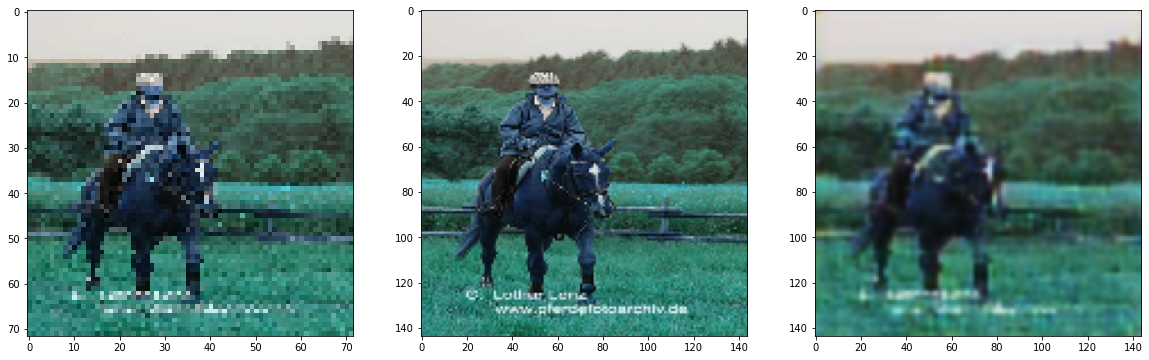

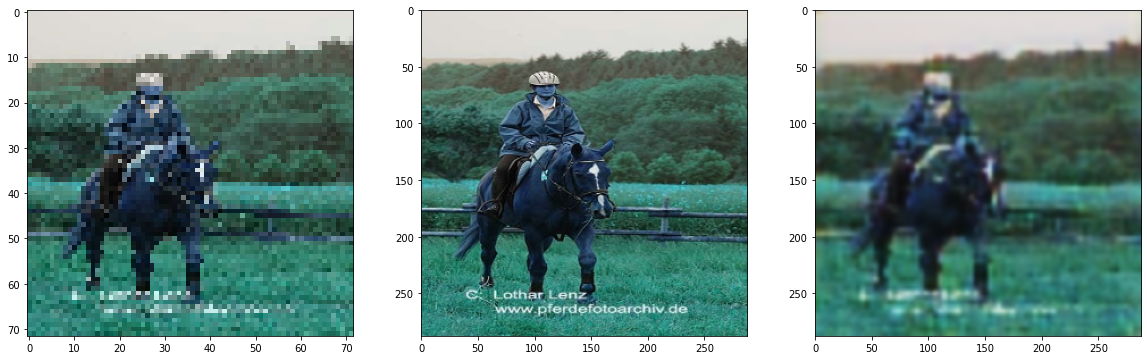

In [ ]:
(VGGPred1,VGGPred2) = VGGModel.predict(X[split:])
plot_multiImages2(0,X[split:],Y_Mid[split:],VGGPred1,Y_Large[split:],VGGPred2)

The VGG model results dont seem to be better than the original simple models

# **DepthToSpace**

In [14]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications import VGG16
import tensorflow as tf

inp = Input((72,72,3))
x = Conv2D(64,(3,3),activation="relu",padding="same")(inp)
x = Conv2D(64,(3,3),activation="relu",padding="same")(x)
vgg = getVGG16(32)(inp)
concat_layer= concatenate([vgg, x])
x = tf.nn.depth_to_space(concat_layer,2)
y1 = Conv2D(3,(1,1),activation="sigmoid")(x)
x = Conv2D(64,(3,3),activation="relu",padding="same")(x)
x = tf.nn.depth_to_space(x, 2)
y2 = Conv2D(3,(1,1),activation="sigmoid")(x)
DTSModel = Model(inputs = inp,outputs = [y1,y2])
DTSModel.compile(loss='mse',optimizer='adam')
DTSModel.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 72, 72, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 72, 72, 64)   1792        input_10[0][0]                   
__________________________________________________________________________________________________
model_4 (Functional)            (None, None, None, 6 38720       input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 72, 72, 64)   36928       conv2d_10[0][0]                  
____________________________________________________________________________________________

In [ ]:
DTSModel.fit(X[:split],[Y_Mid[:split],Y_Large[:split]],validation_data=(X[split:],[Y_Mid[split:],Y_Large[split:]]),epochs=100)

## **Results**

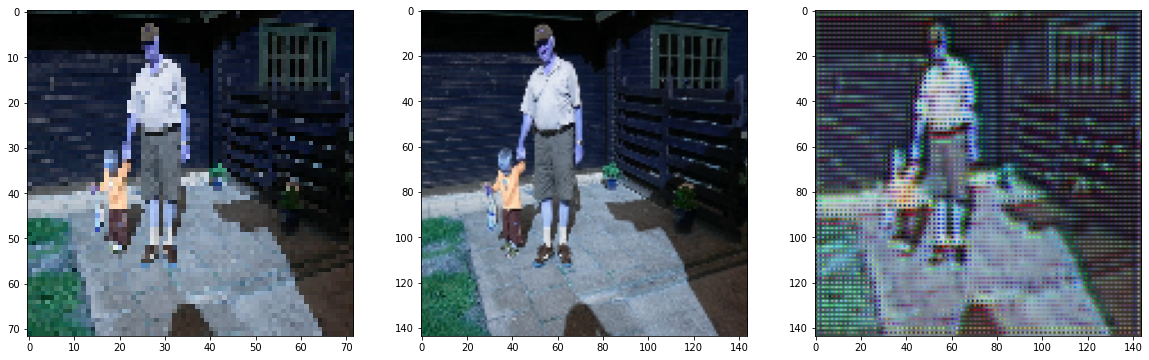

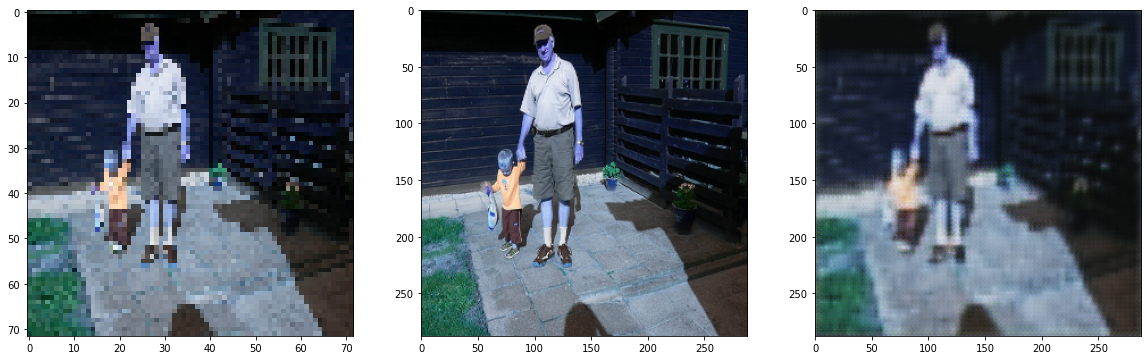

In [17]:
(DTSPred1,DTSPred2) = VGGModel.predict(X[split:])
plot_multiImages2(0,X[split:],Y_Mid[split:],DTSPred1,Y_Large[split:],DTSPred2)

The DTS model has created some sort of pixelating effect on the image, this effect is very noticable in the Medium sized prediction and less so in the large one, but still noticable.

# **Custom Callback**

In order to create an image sequence built from images predicted by the model while it is training to see the improvement, we will create a Callback that saves a prediction of a picture each Epoch.

In [22]:
from tensorflow import keras
EpochImages = []

class CustomCallback(keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
      EpochImages.append(self.model.predict(X[0:1]))
      print(epoch)

# **Enhanced Model**

The added complexity of the VGG and depth to space methods seem to have caused problems to the image, specifically it seems that the image is heavily pixelated this effect can be seen in the results of the VGG and DTS models.
Because of that the enhanced model will be built upon the original Rel_Block model.

The simpler models produced good results but could not generate the sharp edges that are present in the original images, we will try and add some complexity to these models in order to try and have more weights to train and perhaps get to the point where we can generate this sharpness.

In [144]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications import VGG16
import tensorflow.nn as tf

inp = Input((None,None,3))
x = Conv2D(32,1)(inp)
x = GetReluBlock(32)(x)
x = GetReluBlock(32)(x)
x = UpSampling2D(size=2, interpolation='bilinear')(x)
y1 = Conv2D(3,(1,1),activation="sigmoid", name='y1')(x)
y1 = Activation(LeakyReLU(alpha=0.2))(y1)
y2 = Conv2D(32,1)(y1)
y2 = GetReluBlock(32)(y2)
y2 = GetReluBlock(32)(y2)
y2 = Conv2D(32,1)(y2)
y2 = UpSampling2D(size=2, interpolation='bilinear')(y2)
y2 = Conv2D(3,(1,1),activation="sigmoid", name='y2')(y2)
y2 = Activation(LeakyReLU(alpha=0.2))(y2)
EnhModel = Model(inputs = inp,outputs = [y1,y2])
EnhModel.compile(loss='mse',optimizer='adam')
EnhModel.summary()

Model: "model_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_59 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d_111 (Conv2D)          (None, None, None, 32)    128       
_________________________________________________________________
model_52 (Functional)        (None, None, None, 32)    18496     
_________________________________________________________________
model_53 (Functional)        (None, None, None, 32)    18496     
_________________________________________________________________
up_sampling2d_18 (UpSampling (None, None, None, 32)    0         
_________________________________________________________________
y1 (Conv2D)                  (None, None, None, 3)     99        
_________________________________________________________________
activation_24 (Activation)   (None, None, None, 3)     0  

In [ ]:
EnhModel.fit(X[:split],[Y_Mid[:split],Y_Large[:split]],validation_data=(X[split:],[Y_Mid[split:],Y_Large[split:]]),epochs=100,callbacks=[CustomCallback()])

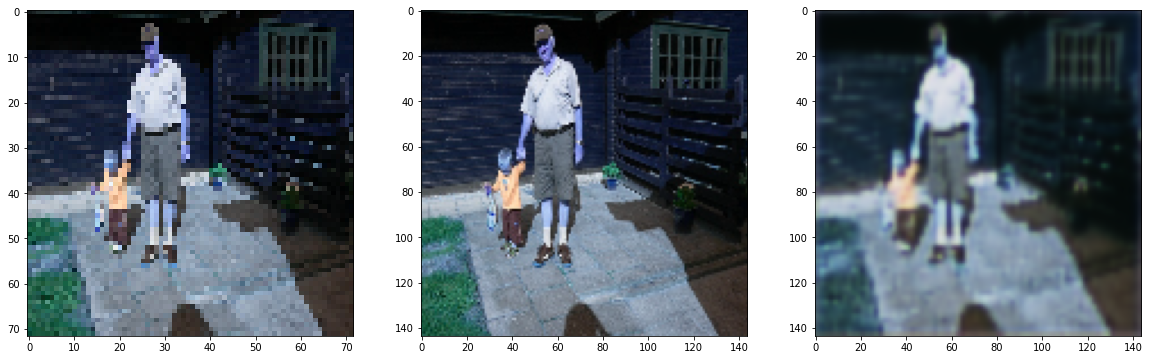

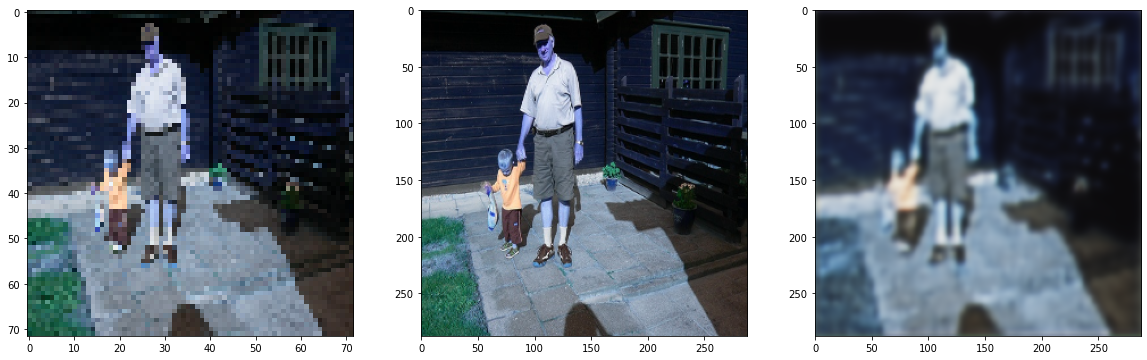

In [146]:
(EnhPred1,EnhPred2) = EnhModel.predict(X[split:])
plot_multiImages2(0,X[split:],Y_Mid[split:],EnhPred1,Y_Large[split:],EnhPred2)

the predicted images are still blurry, it seems the models just add more pixels of the same color near the original pixels, the result is a sharp version of the original pixelated picture. In addition to that, it seems the image has increased in brightness for some reason.

To get to a point where we reach true sharpness, we will need a more complex model and more data to manage to recreate the fine points that are found in the original high resolution pictures.

In [123]:
imgs = []
for img in EpochImages:
  imgs.append(img[0][0])

In [124]:
NormImgs = []
for counter in range(len(imgs)):
  NormImgs.append(cv2.normalize(imgs[counter], None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F))
  NormImgs[counter] = NormImgs[counter].astype(np.uint8)


In [126]:
# save it as a gif
from moviepy.editor import ImageSequenceClip
clip = ImageSequenceClip(list(NormImgs), fps=5)
clip.write_gif('/content/test2.gif', fps=5)


[MoviePy] Building file /content/test2.gif with imageio


100%|██████████| 100/100 [00:03<00:00, 27.99it/s]


# Training Process Gif

![gif](https://media.giphy.com/media/xMSVgY2yz6Y760cstO/giphy.gif)

Original

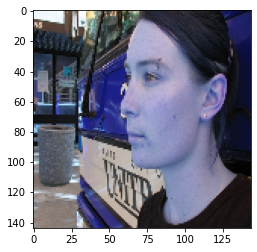

In [148]:
plt.imshow(Y_Mid[0])

Wow!
Very cool idea to create this gif, it really shows the learning process achieved by the model.
At the start we can see the picture has the general guidelines of the original but the colors are way off, and as the weights are trained the colors start to converge to their required values.